In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings('ignore')

vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [3]:
list_dfs = []

list_files = os.listdir("../../results/results_training_activity/")

for element in list_files:
    df_data = pd.read_csv(f"../../results/results_training_activity/{element}")
    values_in_name = element.split("_exploring_")
    encoder = values_in_name[0]
    iteration = values_in_name[-1].replace(".csv", "")

    df_data["encoder"] = encoder
    list_dfs.append(df_data)

df_exploring = pd.concat(list_dfs, axis=0)
df_exploring

,description,r2_value,mean_abs_error_value,mean_square_error_value,fit_time,score_time,test_max_error,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,test_neg_root_mean_squared_error,test_r2,iteration,encoder
0,KernelRidge,0.000880,0.254726,0.276491,0.736431,0.081356,-0.459839,-0.250864,-0.075006,-0.283584,-0.273862,-0.000450,22,word2vec
1,GaussianProcessRegressor,0.566157,0.147504,0.182196,11.223121,3.391234,-0.600923,-0.151607,-0.035558,-0.129591,-0.188531,0.525419,22,word2vec
2,BayesianRidge,0.352657,0.186683,0.222556,0.305584,0.004703,-0.612359,-0.186045,-0.049154,-0.171153,-0.221689,0.344240,22,word2vec
3,TweedieRegressor,-0.000057,0.254858,0.276620,0.010055,0.004531,-0.459937,-0.250954,-0.075056,-0.283718,-0.273953,-0.001119,22,word2vec
4,SGDRegressor,0.000008,0.254709,0.276612,0.037432,0.004692,-0.462321,-0.251084,-0.075076,-0.284038,-0.273988,-0.001372,22,word2vec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,BaggingRegressor,0.402745,0.155726,0.211119,5.781697,0.027856,-0.705396,-0.159805,-0.050252,-0.102847,-0.224045,0.336373,29,Group_7
12,DecisionTreeRegressor,0.170866,0.172675,0.248748,0.930594,0.008396,-0.776366,-0.177766,-0.065830,-0.101737,-0.256494,0.130998,29,Group_7
13,SVR,0.164553,0.223157,0.249694,2.239177,0.789983,-0.502100,-0.227583,-0.064091,-0.238672,-0.253139,0.153995,29,Group_7
14,KNeighborsRegressor,0.443688,0.156181,0.203755,0.008536,0.084544,-0.684143,-0.159299,-0.043057,-0.125120,-0.207470,0.431327,29,Group_7


In [4]:
df_exploring_validating = df_exploring[["description", "r2_value", "mean_abs_error_value", "mean_square_error_value", "iteration", "encoder"]]
df_exploring_validating["stage"] = "Validation"
df_exploring_validating = df_exploring_validating[df_exploring_validating["r2_value"]>0]
df_exploring_validating

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
0,KernelRidge,0.000880,0.254726,0.276491,22,word2vec,Validation
1,GaussianProcessRegressor,0.566157,0.147504,0.182196,22,word2vec,Validation
2,BayesianRidge,0.352657,0.186683,0.222556,22,word2vec,Validation
4,SGDRegressor,0.000008,0.254709,0.276612,22,word2vec,Validation
6,GradientBoostingRegressor,0.314316,0.201012,0.229052,22,word2vec,Validation
...,...,...,...,...,...,...,...
11,BaggingRegressor,0.402745,0.155726,0.211119,29,Group_7,Validation
12,DecisionTreeRegressor,0.170866,0.172675,0.248748,29,Group_7,Validation
13,SVR,0.164553,0.223157,0.249694,29,Group_7,Validation
14,KNeighborsRegressor,0.443688,0.156181,0.203755,29,Group_7,Validation


In [5]:
df_exploring_training = df_exploring[["description", 'test_r2', "iteration", "encoder"]]
df_exploring_training.columns = ["description", 'r2_value', "iteration", "encoder"]
df_exploring_training["stage"] = "Training"
df_exploring_training = df_exploring_training[df_exploring_training["r2_value"]>0]
df_exploring_training

,description,r2_value,iteration,encoder,stage
1,GaussianProcessRegressor,0.525419,22,word2vec,Training
2,BayesianRidge,0.344240,22,word2vec,Training
6,GradientBoostingRegressor,0.275594,22,word2vec,Training
7,HistGradientBoostingRegressor,0.376191,22,word2vec,Training
8,AdaBoostRegressor,0.118078,22,word2vec,Training
...,...,...,...,...,...
11,BaggingRegressor,0.336373,29,Group_7,Training
12,DecisionTreeRegressor,0.130998,29,Group_7,Training
13,SVR,0.153995,29,Group_7,Training
14,KNeighborsRegressor,0.431327,29,Group_7,Training


In [6]:
df_concat = pd.concat([df_exploring_training, df_exploring_validating], axis=0)
df_concat = df_concat[["description", "r2_value","iteration", "encoder", "stage"]]
df_concat

,description,r2_value,iteration,encoder,stage
1,GaussianProcessRegressor,0.525419,22,word2vec,Training
2,BayesianRidge,0.344240,22,word2vec,Training
6,GradientBoostingRegressor,0.275594,22,word2vec,Training
7,HistGradientBoostingRegressor,0.376191,22,word2vec,Training
8,AdaBoostRegressor,0.118078,22,word2vec,Training
...,...,...,...,...,...
11,BaggingRegressor,0.402745,29,Group_7,Validation
12,DecisionTreeRegressor,0.170866,29,Group_7,Validation
13,SVR,0.164553,29,Group_7,Validation
14,KNeighborsRegressor,0.443688,29,Group_7,Validation


<Axes: xlabel='r2_value', ylabel='encoder'>

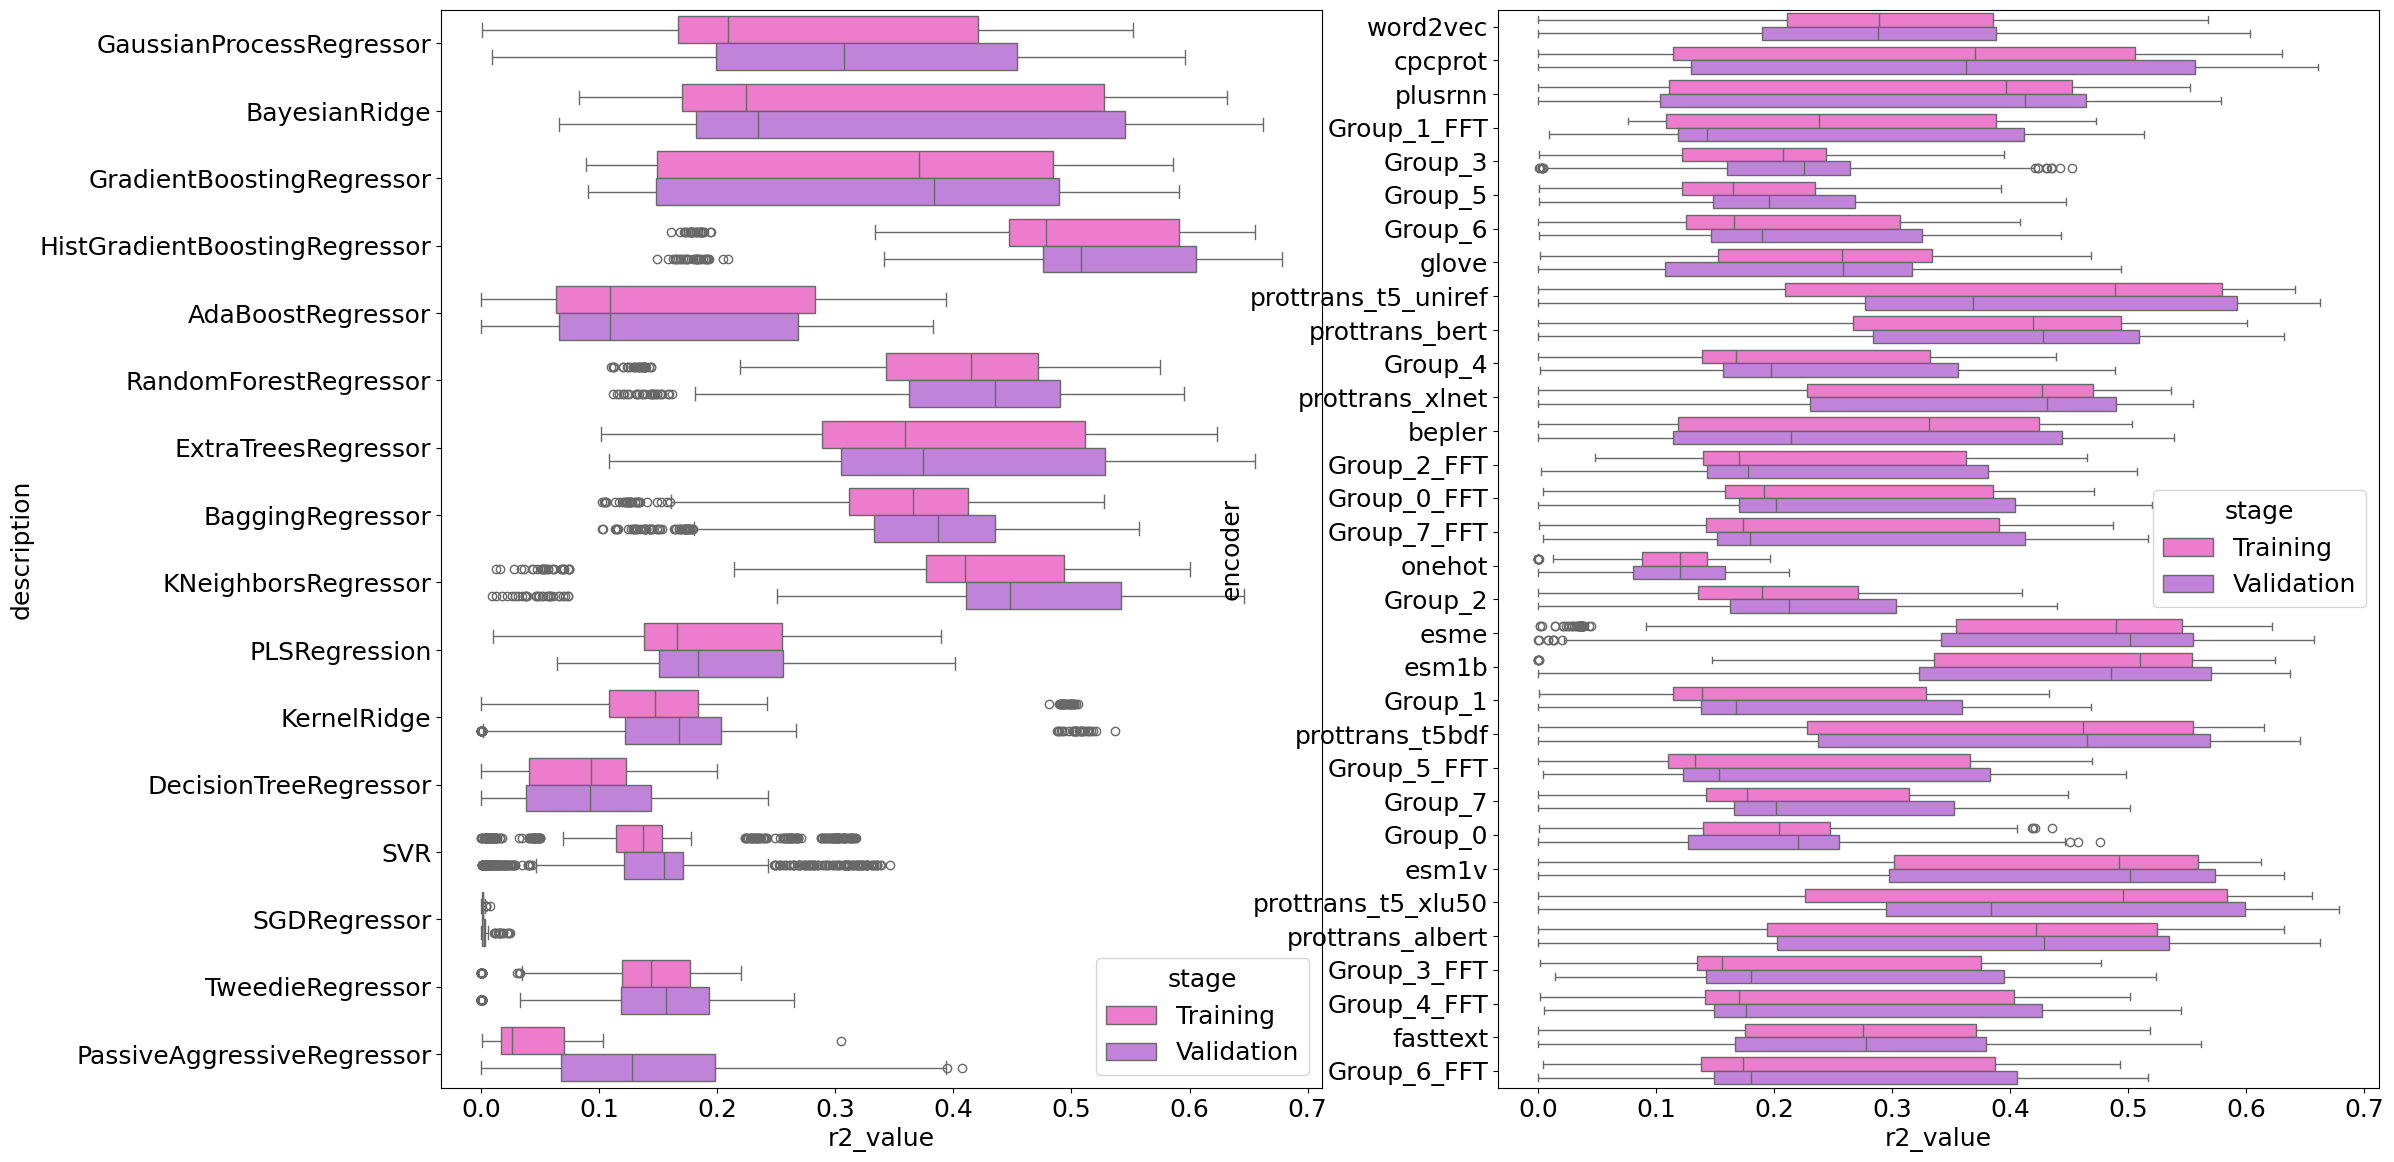

In [7]:
fig, axes = plt.subplots(1,2, figsize=(25,14))

sns.boxplot(ax=axes[0], data=df_concat, x="r2_value", hue="stage", y="description")
sns.boxplot(ax=axes[1], data=df_concat, x="r2_value", hue="stage", y="encoder")

In [8]:
df_exploring_training.sort_values(by="r2_value", ascending=False)

,description,r2_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,6.556096e-01,10,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.445757e-01,17,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.441517e-01,1,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.423972e-01,13,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.410752e-01,13,prottrans_t5_uniref,Training
...,...,...,...,...,...
0,KernelRidge,4.313999e-06,16,onehot,Training
3,TweedieRegressor,4.181095e-06,18,cpcprot,Training
3,TweedieRegressor,2.116032e-06,27,prottrans_albert,Training
4,SGDRegressor,9.575456e-07,21,plusrnn,Training


In [9]:
df_exploring_validating.sort_values(by="r2_value", ascending=False)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.666142,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.662775,0.124775,0.160232,23,prottrans_t5_uniref,Validation
2,BayesianRidge,0.662302,0.127588,0.159942,19,prottrans_albert,Validation
7,HistGradientBoostingRegressor,0.661948,0.123994,0.160056,27,prottrans_t5_xlu50,Validation
...,...,...,...,...,...,...,...
4,SGDRegressor,0.000013,0.252744,0.275473,28,fasttext,Validation
4,SGDRegressor,0.000008,0.254709,0.276612,22,word2vec,Validation
4,SGDRegressor,0.000006,0.253979,0.275232,19,fasttext,Validation
3,TweedieRegressor,0.000004,0.249204,0.273084,10,esm1v,Validation


In [10]:
df_exploring_validating.sort_values(by="mean_abs_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
14,KNeighborsRegressor,0.637625,0.120315,0.163695,20,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.646222,0.121298,0.164117,23,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.627219,0.121761,0.166825,6,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
14,KNeighborsRegressor,0.631430,0.121974,0.167931,22,esm1v,Validation
...,...,...,...,...,...,...,...
4,SGDRegressor,0.000719,0.255104,0.276513,22,prottrans_bert,Validation
3,TweedieRegressor,0.000015,0.255110,0.277606,12,esm1v,Validation
8,AdaBoostRegressor,0.000799,0.255150,0.277497,12,Group_6,Validation
4,SGDRegressor,0.001357,0.255209,0.277420,12,prottrans_t5_xlu50,Validation


In [11]:
df_exploring_validating.sort_values(by="mean_square_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.666142,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
2,BayesianRidge,0.658900,0.127382,0.159366,18,prottrans_albert,Validation
7,HistGradientBoostingRegressor,0.660475,0.125569,0.159479,4,prottrans_t5_uniref,Validation
2,BayesianRidge,0.662302,0.127588,0.159942,19,prottrans_albert,Validation
...,...,...,...,...,...,...,...
0,KernelRidge,0.000693,0.255012,0.277512,12,word2vec,Validation
3,TweedieRegressor,0.000665,0.255030,0.277516,12,prottrans_xlnet,Validation
0,KernelRidge,0.000620,0.254965,0.277522,12,onehot,Validation
4,SGDRegressor,0.000195,0.254792,0.277581,12,glove,Validation
